# CS381/780 Data Analytics Final Project

### Due on 5/19/2021 23:59 pm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on an original student performance dataset provided on Kaggle

https://www.kaggle.com/impapan/student-performance-data-set


### I have modified the original dataset slightly, removed some attributes and include the first term grade from the language course


In [4]:
df = pd.read_csv("student_performance_modified.csv")
df.head()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,sex,address,famsize,...,paid,activities,higher,internet,famrel,freetime,Dalc,Walc,health,Math_FinalG3
0,18.0,2,2,0,6,5.0,0,F,U,GT3,...,no,no,yes,no,4,3,1,1,3,6
1,17.0,1,2,0,4,5.0,9,F,U,GT3,...,no,no,yes,yes,5,3,1,1,3,6
2,15.0,1,2,3,10,7.0,12,F,U,LE3,...,yes,no,yes,yes,4,3,2,3,3,10
3,15.0,1,3,0,2,15.0,14,F,U,GT3,...,yes,yes,yes,yes,3,2,1,1,5,15
4,16.0,1,2,0,4,6.0,11,F,U,GT3,...,yes,no,yes,no,4,3,1,2,5,10


In [5]:
df.columns

Index(['age', 'traveltime', 'studytime', 'failures', 'absences', 'Math_G1',
       'Language_G1', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'schoolsup', 'famsup', 'paid', 'activities', 'higher',
       'internet', 'famrel', 'freetime', 'Dalc', 'Walc', 'health',
       'Math_FinalG3'],
      dtype='object')

### First we replace the Math_FinalG3 by a binary label to indicate underperformance

In [6]:
df['underperformance'] = df['Math_FinalG3'].apply(lambda x: 1 if x < 9 else 0)
df = df.drop(['Math_FinalG3'], axis=1)
df.head()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,sex,address,famsize,...,paid,activities,higher,internet,famrel,freetime,Dalc,Walc,health,underperformance
0,18.0,2,2,0,6,5.0,0,F,U,GT3,...,no,no,yes,no,4,3,1,1,3,1
1,17.0,1,2,0,4,5.0,9,F,U,GT3,...,no,no,yes,yes,5,3,1,1,3,1
2,15.0,1,2,3,10,7.0,12,F,U,LE3,...,yes,no,yes,yes,4,3,2,3,3,0
3,15.0,1,3,0,2,15.0,14,F,U,GT3,...,yes,yes,yes,yes,3,2,1,1,5,0
4,16.0,1,2,0,4,6.0,11,F,U,GT3,...,yes,no,yes,no,4,3,1,2,5,0


### Your task in the final project is build the best predictive model to predict who would underperform in their final Math Grade so that the school can proactively find ways to help the students

* Use any one of the models (Logistic, SVM, Naive Bayes, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.

### Math_G1 is the Math Grade in first term and Language_G1 is the first term grade in language. Math_G1 should have a high correlation of the Student Final Math Grade. However, it won't be available at the beginning of the school year

### Therefore, you need to build two sets of models. One set is not to use these G1 variables, the others you could. Find out if the language grade will be useful or not in determining the final Math grade

### Make sure your work include the following steps

* EDA (checking missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations


<AxesSubplot:xlabel='underperformance', ylabel='count'>

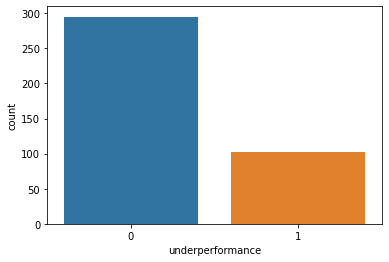

In [7]:
sns.countplot(df['underperformance'])

### Good Luck !!!

Show all your work below

## Check if there are any nulls or NA's

In [8]:
df.isnull().any()

age                  True
traveltime          False
studytime           False
failures            False
absences            False
Math_G1              True
Language_G1         False
sex                 False
address             False
famsize             False
Pstatus             False
Medu                False
Fedu                False
Mjob                False
Fjob                False
schoolsup           False
famsup              False
paid                False
activities          False
higher              False
internet            False
famrel              False
freetime            False
Dalc                False
Walc                False
health              False
underperformance    False
dtype: bool

### We see that age and Math_G1 have null/NA values

## Remove rows that have nulls or NA's

In [9]:
df.isnull().any()
df = df.dropna()

In [10]:
df.isnull().any()

age                 False
traveltime          False
studytime           False
failures            False
absences            False
Math_G1             False
Language_G1         False
sex                 False
address             False
famsize             False
Pstatus             False
Medu                False
Fedu                False
Mjob                False
Fjob                False
schoolsup           False
famsup              False
paid                False
activities          False
higher              False
internet            False
famrel              False
freetime            False
Dalc                False
Walc                False
health              False
underperformance    False
dtype: bool

### We have dropped all null/NA values

In [11]:
df.describe()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,Medu,Fedu,famrel,freetime,Dalc,Walc,health,underperformance
count,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000
mean,16.893939,1.446970,2.032828,0.333333,5.714646,10.919192,12.010101,2.747475,2.520202,3.944444,3.234848,1.479798,2.287879,3.550505,0.257576
std,4.136147,0.696985,0.839791,0.742899,7.993788,3.321359,2.419310,1.093997,1.087138,0.895527,0.997667,0.889942,1.287901,1.390738,0.437852
min,15.000000,1.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,1.000000,1.000000,0.000000,0.000000,8.000000,10.000000,2.000000,2.000000,4.000000,3.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,1.000000,2.000000,0.000000,4.000000,11.000000,12.000000,3.000000,2.000000,4.000000,3.000000,1.000000,2.000000,4.000000,0.000000
75%,18.000000,2.000000,2.000000,0.000000,8.000000,13.000000,14.000000,4.000000,3.000000,5.000000,4.000000,2.000000,3.000000,5.000000,1.000000
max,95.000000,4.000000,4.000000,3.000000,75.000000,19.000000,18.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


## Check if there are any outliers in all numerical fields using boxplots

<AxesSubplot:xlabel='age'>

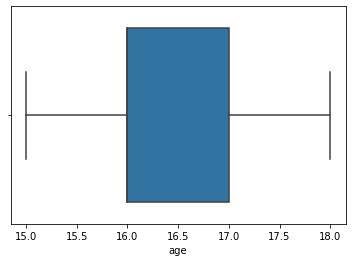

In [12]:
#age
plt.figure()
df = df[df['age'] < 19]
sns.boxplot(x=df['age'])
#I removed the outliers that were greater than the age 16-17

<AxesSubplot:xlabel='traveltime'>

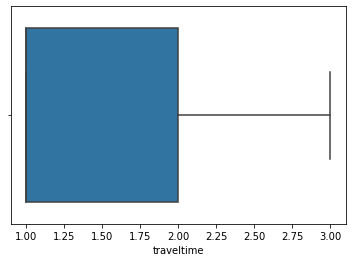

In [13]:
#traveltime
plt.figure()
df = df[df['traveltime'] < 4]
sns.boxplot(x=df['traveltime'])
#Removed travel time outliers

<AxesSubplot:xlabel='studytime'>

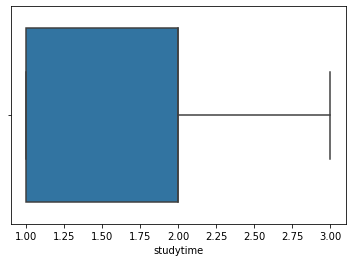

In [14]:
#studytime
plt.figure()
df = df[df['studytime'] < 3.5]
sns.boxplot(x=df['studytime'])
#Removed study time outliers

<AxesSubplot:xlabel='failures'>

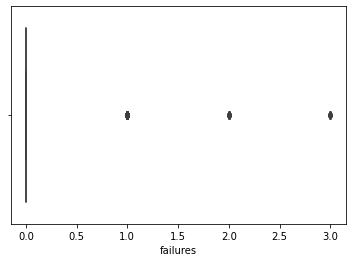

In [15]:
#failures
plt.figure()
sns.boxplot(x=df['failures'])
#Left this alone

<AxesSubplot:xlabel='absences'>

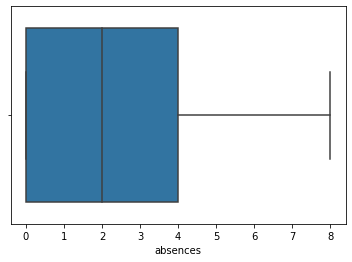

In [16]:
#absences
plt.figure()
df = df[df['absences'] < 9]
sns.boxplot(x=df['absences'])
#Removed anything more than 4 absenses, which were around the 20 mark. 

<AxesSubplot:xlabel='Math_G1'>

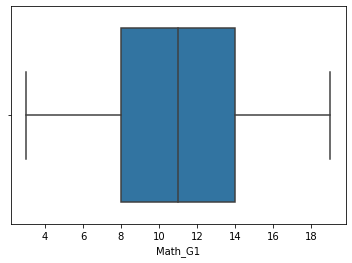

In [17]:
#Math_G1
plt.figure()
sns.boxplot(x=df['Math_G1'])
#Left alone 

<AxesSubplot:xlabel='Language_G1'>

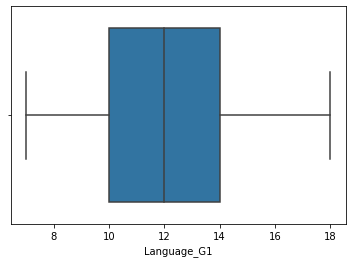

In [18]:
#Language_G1
plt.figure()
df = df[df['Language_G1'] != 0]
sns.boxplot(x=df['Language_G1'])
#Removed the one outlier which was a 0 

<AxesSubplot:xlabel='Medu'>

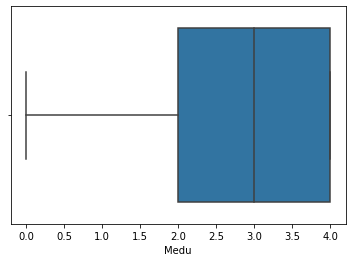

In [19]:
#Medu 
plt.figure()
sns.boxplot(x=df['Medu'])
#Left this alone 

<AxesSubplot:xlabel='Fedu'>

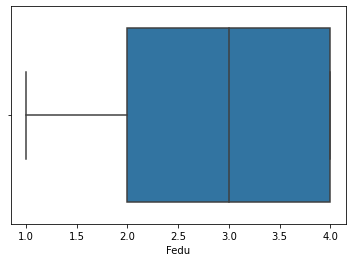

In [20]:
#Fedu
plt.figure()
df = df[df['Fedu'] != 0]
sns.boxplot(x=df['Fedu'])
#Removed the one outlier that was a 0 

<AxesSubplot:xlabel='famrel'>

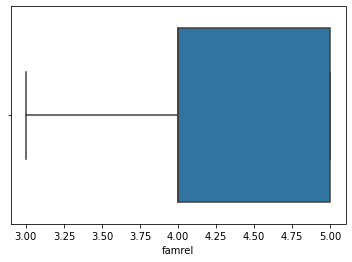

In [21]:
#famrel
plt.figure()
df = df[df['famrel'] > 2.5]
sns.boxplot(x=df['famrel'])
#Removed outliers which were above 2.5

<AxesSubplot:xlabel='freetime'>

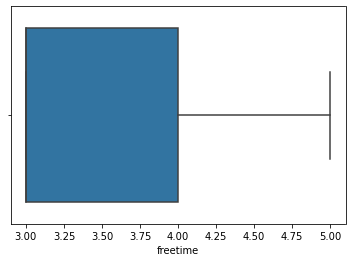

In [22]:
#freetime
plt.figure()
df = df[df['freetime'] > 2.0]
sns.boxplot(x=df['freetime'])
#Removed outliers which were above 2 

<AxesSubplot:xlabel='Dalc'>

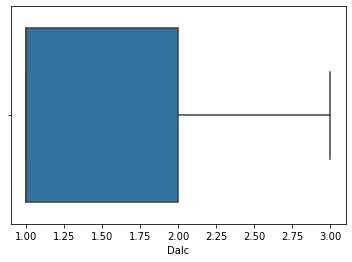

In [23]:
#Dalc
plt.figure()
df = df[df['Dalc'] < 3.1]
sns.boxplot(x=df['Dalc'])
#Removed outliers which were under 3.1

<AxesSubplot:xlabel='Walc'>

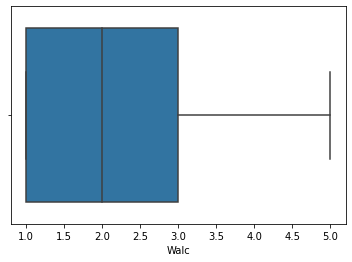

In [24]:
#Walc
plt.figure()
sns.boxplot(x=df['Walc'])
#Did not remove anything

<AxesSubplot:xlabel='health'>

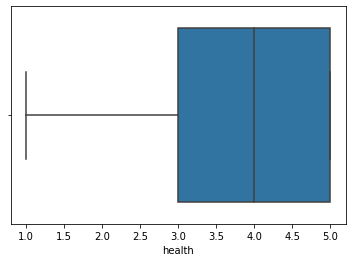

In [25]:
#health
plt.figure()
sns.boxplot(x=df['health'])
#Did not remove anything

<AxesSubplot:xlabel='underperformance'>

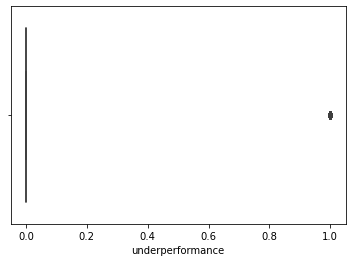

In [26]:
#underperformance
plt.figure()
sns.boxplot(x=df['underperformance'])
#Did not remove anything 

<AxesSubplot:xlabel='underperformance', ylabel='count'>

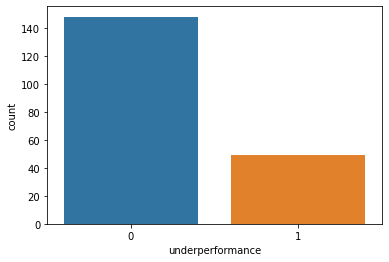

In [27]:
sns.countplot(df['underperformance'])

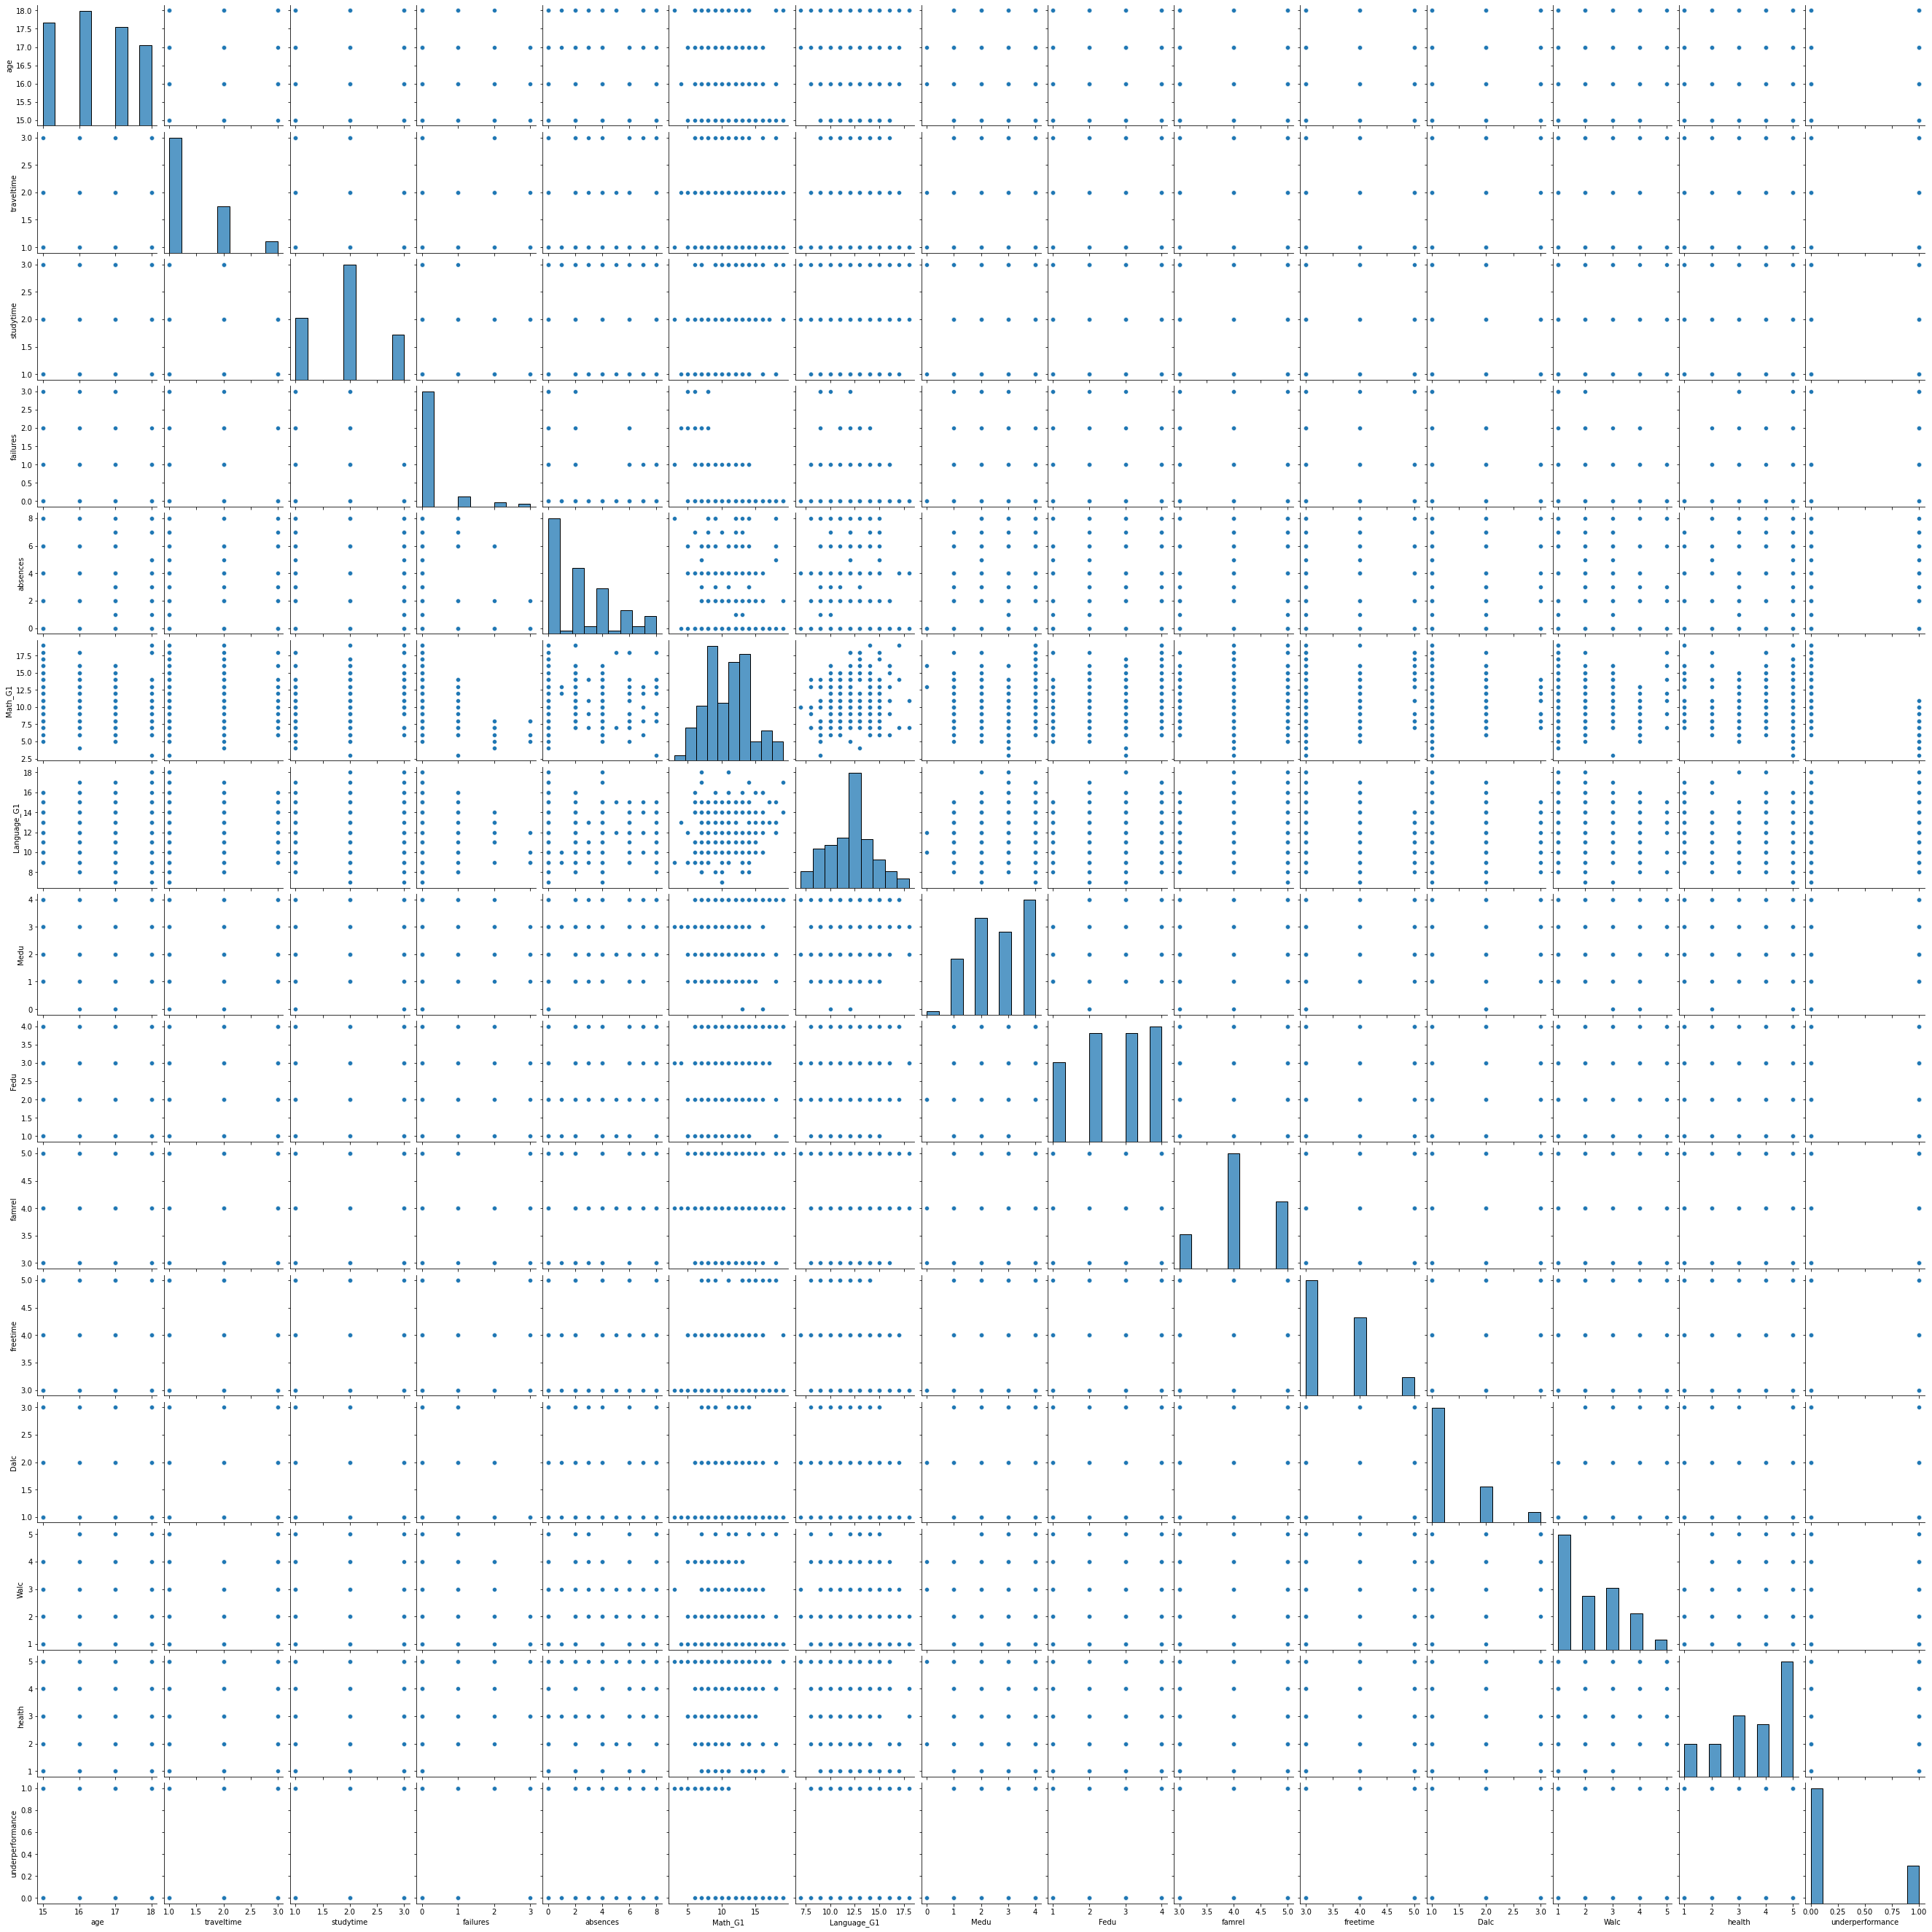

In [28]:
sns.pairplot(data = df, kind='scatter')

In [29]:
df.corr()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,Medu,Fedu,famrel,freetime,Dalc,Walc,health,underperformance
age,1.000000,0.190732,0.183704,0.013902,0.053625,-0.134209,-0.008117,-0.233281,-0.195622,-0.027401,-0.089732,0.111895,0.133195,-0.101164,0.148075
traveltime,0.190732,1.000000,-0.192691,0.049505,0.040708,-0.019124,-0.000055,-0.087976,-0.074580,-0.062829,0.014000,0.054406,0.130784,-0.007977,0.064487
studytime,0.183704,-0.192691,1.000000,-0.195242,-0.036098,0.142850,0.048751,0.070092,0.043658,0.124567,-0.100372,-0.204026,-0.215375,-0.099168,-0.089640
failures,0.013902,0.049505,-0.195242,1.000000,-0.075472,-0.359949,-0.123071,-0.144677,-0.154929,-0.168726,0.061905,0.062595,0.061311,0.082306,0.447698
absences,0.053625,0.040708,-0.036098,-0.075472,1.000000,0.013113,-0.014674,0.010501,0.011924,-0.021986,0.036679,0.082849,0.163421,-0.017794,-0.188348
Math_G1,-0.134209,-0.019124,0.142850,-0.359949,0.013113,1.000000,0.208218,0.172266,0.228755,0.090928,0.191019,-0.057624,-0.075118,-0.014969,-0.624185
Language_G1,-0.008117,-0.000055,0.048751,-0.123071,-0.014674,0.208218,1.000000,0.200957,0.091257,-0.017627,-0.065600,-0.041903,-0.052797,-0.080994,-0.044885
Medu,-0.233281,-0.087976,0.070092,-0.144677,0.010501,0.172266,0.200957,1.000000,0.634055,0.163531,0.144490,0.042672,-0.032944,0.027169,-0.101238
Fedu,-0.195622,-0.074580,0.043658,-0.154929,0.011924,0.228755,0.091257,0.634055,1.000000,0.099130,0.062384,-0.008260,-0.038891,0.073050,-0.138983
famrel,-0.027401,-0.062829,0.124567,-0.168726,-0.021986,0.090928,-0.017627,0.163531,0.099130,1.000000,0.102266,-0.122496,-0.185226,0.023539,-0.166782


## Dummify

In [30]:
dummifyThese = df[['sex', 'health', 'famsize', 'Mjob', 'Fjob','address', 'Pstatus','schoolsup', 'famsup', 'paid', 'higher', 'internet']]

In [31]:
dummifyThese.head()

,sex,health,famsize,Mjob,Fjob,address,Pstatus,schoolsup,famsup,paid,higher,internet
1,F,3,GT3,at_home,other,U,T,no,yes,no,yes,yes
4,F,5,GT3,other,other,U,T,no,yes,yes,yes,no
6,M,3,LE3,other,other,U,T,no,no,no,yes,yes
9,M,5,GT3,other,other,U,T,no,yes,yes,yes,yes
10,F,2,GT3,teacher,health,U,T,no,yes,yes,yes,yes


In [32]:
dummy = pd.get_dummies(df)

In [33]:
dummy

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,Medu,Fedu,famrel,...,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,higher_no,higher_yes,internet_no,internet_yes
1,17.0,1,2,0,4,5.0,9,1,1,5,...,0,1,1,0,1,0,0,1,0,1
4,16.0,1,2,0,4,6.0,11,3,3,4,...,0,1,0,1,1,0,0,1,1,0
6,16.0,1,2,0,0,12.0,13,2,2,4,...,1,0,1,0,1,0,0,1,0,1
9,15.0,1,2,0,0,14.0,12,3,4,5,...,0,1,0,1,0,1,0,1,0,1
10,15.0,1,2,0,0,10.0,14,4,4,3,...,0,1,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,17.0,2,2,0,2,11.0,11,2,3,4,...,1,0,1,0,0,1,0,1,0,1
386,18.0,2,3,0,2,10.0,10,2,2,5,...,1,0,0,1,1,0,0,1,1,0
387,18.0,3,1,0,7,6.0,15,4,4,4,...,0,1,0,1,0,1,0,1,0,1
389,18.0,1,2,0,0,7.0,10,3,1,4,...,0,1,0,1,1,0,0,1,0,1


## I choose to not normalize because all of our columns are categorical values. I don't need to change them into numbers.  

## Split data for testing

In [34]:
X = dummy.drop('underperformance', axis = 1)
Y = df['underperformance']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=0)

In [35]:
print(X)

      age  traveltime  studytime  failures  absences  Math_G1  Language_G1  \
1    17.0           1          2         0         4      5.0            9   
4    16.0           1          2         0         4      6.0           11   
6    16.0           1          2         0         0     12.0           13   
9    15.0           1          2         0         0     14.0           12   
10   15.0           1          2         0         0     10.0           14   
..    ...         ...        ...       ...       ...      ...          ...   
383  17.0           2          2         0         2     11.0           11   
386  18.0           2          3         0         2     10.0           10   
387  18.0           3          1         0         7      6.0           15   
389  18.0           1          2         0         0      7.0           10   
394  18.0           3          1         0         0     11.0           14   

     Medu  Fedu  famrel  ...  famsup_no  famsup_yes  paid_no  p

In [36]:
print(Y)

1      1
4      0
6      0
9      0
10     0
      ..
383    0
386    0
387    1
389    1
394    0
Name: underperformance, Length: 197, dtype: int64


## Now we start making our models including Math_G1 and Language_G1

## Logistic Regression Model

In [37]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)
ourPrediction = LR.predict(X_test)
print(classification_report(Y_test, ourPrediction))
print("Accuracy Score is: ", accuracy_score(Y_test, ourPrediction))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88        32
           1       0.54      0.88      0.67         8

    accuracy                           0.82        40
   macro avg       0.75      0.84      0.77        40
weighted avg       0.88      0.82      0.84        40

Accuracy Score is:  0.825


## Random Forest Model

In [38]:
RF = RandomForestClassifier(n_estimators=100)
RF.fit(X_train, Y_train)
ourPrediction = RF.predict(X_test)
print(classification_report(Y_test, ourPrediction))
print("Accuracy Score is: ", accuracy_score(Y_test, ourPrediction))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        32
           1       0.75      0.75      0.75         8

    accuracy                           0.90        40
   macro avg       0.84      0.84      0.84        40
weighted avg       0.90      0.90      0.90        40

Accuracy Score is:  0.9


## Decision Tree Model w/ Gini

In [39]:
DT = DecisionTreeClassifier(criterion='gini')
DT.fit(X_train,Y_train)
ourPrediction = DT.predict(X_test)
print(classification_report(Y_test, ourPrediction))
print("Accuracy Score is: ", accuracy_score(Y_test, ourPrediction))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        32
           1       0.60      0.75      0.67         8

    accuracy                           0.85        40
   macro avg       0.77      0.81      0.78        40
weighted avg       0.87      0.85      0.86        40

Accuracy Score is:  0.85


### We see that our most accurate model is the random forest model with an accuracy of 87.5% and both Random forest and logistic regression have the highest f1 score of .67 

## Cross Validation

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
import random
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Logistic Regression Cross Validation

In [42]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LR
    model.fit(X_train, Y_train)
    print(classification_report(Y_test, ourPrediction))
    print("Accuracy Score is: ", accuracy_score(Y_test, ourPrediction))
    Y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        34
           1       0.10      0.17      0.12         6

    accuracy                           0.65        40
   macro avg       0.47      0.45      0.45        40
weighted avg       0.72      0.65      0.68        40

Accuracy Score is:  0.65
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.30      0.43      0.35         7

    accuracy                           0.73        40
   macro avg       0.58      0.61      0.59        40
weighted avg       0.77      0.72      0.74        40

Accuracy Score is:  0.725
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        30
           1       0.50      0.50      0.50        10

    accuracy                           0.75        40
   macro avg       0.67      0.67      0.67        40
weighted avg       0.75

In [43]:
print("Accuracy Score is: ", accuracy_score(Y_test, ourPrediction))

Accuracy Score is:  0.65


In [44]:
result = cross_val_score(LR, X_train, Y_train, cv=10)
result

array([0.875     , 1.        , 0.75      , 0.875     , 0.875     ,
       0.875     , 0.875     , 0.8       , 0.93333333, 0.73333333])

#### I would say the model passes cross validation because our values are very close to each other. Our highest f1 score was .40

### Random Forest Cross Validation

In [45]:
counter = 1 
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = RF
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print('Trial:' + str(counter))
    print(classification_report(Y_test, ourPrediction))
    print("Accuracy Score is: ", accuracy_score(Y_test, ourPrediction))
    counter = counter + 1

Trial:1
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        32
           1       0.20      0.25      0.22         8

    accuracy                           0.65        40
   macro avg       0.50      0.50      0.50        40
weighted avg       0.68      0.65      0.66        40

Accuracy Score is:  0.65
Trial:2
              precision    recall  f1-score   support

           0       0.73      0.71      0.72        31
           1       0.10      0.11      0.11         9

    accuracy                           0.57        40
   macro avg       0.42      0.41      0.41        40
weighted avg       0.59      0.57      0.58        40

Accuracy Score is:  0.575
Trial:3
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        28
           1       0.20      0.17      0.18        12

    accuracy                           0.55        40
   macro avg       0.43      0.44      0.44        40

In [46]:
result = cross_val_score(RF, X_train, Y_train, cv=10)
result

array([0.9375    , 0.75      , 0.8125    , 0.9375    , 0.9375    ,
       0.8125    , 0.9375    , 0.86666667, 0.8       , 0.73333333])

### We see that the accuracy scores are pretty close to each other most of the time and I would say the model passes cross validation. Our highest f1 score was .40

## Decision Tree Model with Gini Cross Validation 

In [47]:
counter = 1 
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = DT
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print('Trial:' + str(counter))
    print(classification_report(Y_test, ourPrediction))
    print("Accuracy Score is: ", accuracy_score(Y_test, ourPrediction))
    counter = counter + 1

Trial:1
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        35
           1       0.00      0.00      0.00         5

    accuracy                           0.62        40
   macro avg       0.42      0.36      0.38        40
weighted avg       0.73      0.62      0.67        40

Accuracy Score is:  0.625
Trial:2
              precision    recall  f1-score   support

           0       0.70      0.72      0.71        29
           1       0.20      0.18      0.19        11

    accuracy                           0.57        40
   macro avg       0.45      0.45      0.45        40
weighted avg       0.56      0.57      0.57        40

Accuracy Score is:  0.575
Trial:3
              precision    recall  f1-score   support

           0       0.70      0.72      0.71        29
           1       0.20      0.18      0.19        11

    accuracy                           0.57        40
   macro avg       0.45      0.45      0.45        4

In [48]:
result = cross_val_score(DT, X_train, Y_train, cv=10)
result

array([1.        , 0.75      , 0.8125    , 0.875     , 0.8125    ,
       0.75      , 0.875     , 0.93333333, 0.8       , 0.8       ])

### The values are not very close to each other here, so I would not say this model passes cross validation because the values are not close to each other.

### From our models, we see that  our highest f1 was .40, which was shared across all the models. 

## Now we perform same model procedure above but drop Math_G1 and Language_G1

In [49]:
dummy2 = pd.get_dummies(df)
dummy2.drop('Math_G1', axis =1, inplace = True)
dummy2.drop('Language_G1', axis = 1, inplace = True)
dummy2


,age,traveltime,studytime,failures,absences,Medu,Fedu,famrel,freetime,Dalc,...,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,higher_no,higher_yes,internet_no,internet_yes
1,17.0,1,2,0,4,1,1,5,3,1,...,0,1,1,0,1,0,0,1,0,1
4,16.0,1,2,0,4,3,3,4,3,1,...,0,1,0,1,1,0,0,1,1,0
6,16.0,1,2,0,0,2,2,4,4,1,...,1,0,1,0,1,0,0,1,0,1
9,15.0,1,2,0,0,3,4,5,5,1,...,0,1,0,1,0,1,0,1,0,1
10,15.0,1,2,0,0,4,4,3,3,1,...,0,1,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,17.0,2,2,0,2,2,3,4,4,1,...,1,0,1,0,0,1,0,1,0,1
386,18.0,2,3,0,2,2,2,5,3,1,...,1,0,0,1,1,0,0,1,1,0
387,18.0,3,1,0,7,4,4,4,4,2,...,0,1,0,1,0,1,0,1,0,1
389,18.0,1,2,0,0,3,1,4,3,1,...,0,1,0,1,1,0,0,1,0,1


In [50]:
X = dummy2.drop('underperformance', axis = 1)
Y = df['underperformance']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

### Logistic Regression

In [51]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)
ourPrediction = LR.predict(X_test)
print(classification_report(Y_test, ourPrediction))
print("Accuracy Score is: ", accuracy_score(Y_test, ourPrediction))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.33      0.25      0.29         8

    accuracy                           0.75        40
   macro avg       0.58      0.56      0.57        40
weighted avg       0.73      0.75      0.74        40

Accuracy Score is:  0.75


### Random Forest

In [52]:
RF = RandomForestClassifier(n_estimators=100)
RF.fit(X_train, Y_train)
ourPrediction = RF.predict(X_test)
print(classification_report(Y_test, ourPrediction))
print("Accuracy Score is: ", accuracy_score(Y_test, ourPrediction))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        32
           1       0.67      0.25      0.36         8

    accuracy                           0.82        40
   macro avg       0.75      0.61      0.63        40
weighted avg       0.80      0.82      0.79        40

Accuracy Score is:  0.825


### Decision Tree w/ Gini

In [53]:
DT = DecisionTreeClassifier(criterion='gini')
DT.fit(X_train,Y_train)
ourPrediction = DT.predict(X_test)
print(classification_report(Y_test, ourPrediction))
print("Accuracy Score is: ", accuracy_score(Y_test, ourPrediction))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77        32
           1       0.25      0.38      0.30         8

    accuracy                           0.65        40
   macro avg       0.54      0.55      0.53        40
weighted avg       0.71      0.65      0.67        40

Accuracy Score is:  0.65


### From these models, we see that the most accurate model was random forest and it had the highest f1_score of .36

### Now do Cross Validations again

### Cross Validation for Logistic Regression

In [54]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LR
    model.fit(X_train, Y_train)
    print(classification_report(Y_test, ourPrediction))
    print("Accuracy Score is: ", accuracy_score(Y_test, ourPrediction))
    Y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.71      0.69      0.70        29
           1       0.25      0.27      0.26        11

    accuracy                           0.57        40
   macro avg       0.48      0.48      0.48        40
weighted avg       0.59      0.57      0.58        40

Accuracy Score is:  0.575
              precision    recall  f1-score   support

           0       0.71      0.69      0.70        29
           1       0.25      0.27      0.26        11

    accuracy                           0.57        40
   macro avg       0.48      0.48      0.48        40
weighted avg       0.59      0.57      0.58        40

Accuracy Score is:  0.575
              precision    recall  f1-score   support

           0       0.79      0.71      0.75        31
           1       0.25      0.33      0.29         9

    accuracy                           0.62        40
   macro avg       0.52      0.52      0.52        40
weighted avg       0.6

In [55]:
result = cross_val_score(LR, X_train, Y_train, cv=10)
result

array([0.75      , 0.8125    , 0.875     , 0.8125    , 0.8125    ,
       0.625     , 0.8125    , 0.8       , 0.8       , 0.86666667])

### I would say this does not pass cross validation because the values are not close to each other - highest f1_score is .32

### Cross Validation for Random Forest

In [56]:
counter = 1 
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = RF
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print('Trial:' + str(counter))
    print(classification_report(Y_test, ourPrediction))
    print("Accuracy Score is: ", accuracy_score(Y_test, ourPrediction))
    counter = counter + 1

Trial:1
              precision    recall  f1-score   support

           0       0.75      0.70      0.72        30
           1       0.25      0.30      0.27        10

    accuracy                           0.60        40
   macro avg       0.50      0.50      0.50        40
weighted avg       0.62      0.60      0.61        40

Accuracy Score is:  0.6
Trial:2
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        30
           1       0.42      0.50      0.45        10

    accuracy                           0.70        40
   macro avg       0.62      0.63      0.62        40
weighted avg       0.72      0.70      0.71        40

Accuracy Score is:  0.7
Trial:3
              precision    recall  f1-score   support

           0       0.93      0.76      0.84        34
           1       0.33      0.67      0.44         6

    accuracy                           0.75        40
   macro avg       0.63      0.72      0.64        40
we

In [57]:
result = cross_val_score(RF, X_train, Y_train, cv=10)
result

array([0.875     , 0.75      , 0.8125    , 0.75      , 0.8125    ,
       0.8125    , 0.75      , 0.8       , 0.73333333, 0.8       ])

### This clearly does not pass cross validation because the values are very far apart from each other, our highest f1 score was .42

### Cross Validation for Decision Tree 

In [58]:
counter = 1 
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = DT
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print('Trial:' + str(counter))
    print(classification_report(Y_test, ourPrediction))
    print("Accuracy Score is: ", accuracy_score(Y_test, ourPrediction))
    counter = counter + 1

Trial:1
              precision    recall  f1-score   support

           0       0.68      0.63      0.66        30
           1       0.08      0.10      0.09        10

    accuracy                           0.50        40
   macro avg       0.38      0.37      0.37        40
weighted avg       0.53      0.50      0.51        40

Accuracy Score is:  0.5
Trial:2
              precision    recall  f1-score   support

           0       0.75      0.68      0.71        31
           1       0.17      0.22      0.19         9

    accuracy                           0.57        40
   macro avg       0.46      0.45      0.45        40
weighted avg       0.62      0.57      0.59        40

Accuracy Score is:  0.575
Trial:3
              precision    recall  f1-score   support

           0       0.79      0.71      0.75        31
           1       0.25      0.33      0.29         9

    accuracy                           0.62        40
   macro avg       0.52      0.52      0.52        40


In [59]:
result = cross_val_score(DT, X_train, Y_train, cv=10)
result

array([0.5625    , 0.625     , 0.6875    , 0.75      , 0.8125    ,
       0.5625    , 0.75      , 0.66666667, 0.8       , 0.4       ])

### Does not pass cross validation, our highest f1_score was .45

## Now we perform the same as before but drop Language_G1

In [60]:
dummy3 = pd.get_dummies(df)
dummy3.drop('Language_G1', axis =1, inplace = True)
dummy3

,age,traveltime,studytime,failures,absences,Math_G1,Medu,Fedu,famrel,freetime,...,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,higher_no,higher_yes,internet_no,internet_yes
1,17.0,1,2,0,4,5.0,1,1,5,3,...,0,1,1,0,1,0,0,1,0,1
4,16.0,1,2,0,4,6.0,3,3,4,3,...,0,1,0,1,1,0,0,1,1,0
6,16.0,1,2,0,0,12.0,2,2,4,4,...,1,0,1,0,1,0,0,1,0,1
9,15.0,1,2,0,0,14.0,3,4,5,5,...,0,1,0,1,0,1,0,1,0,1
10,15.0,1,2,0,0,10.0,4,4,3,3,...,0,1,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,17.0,2,2,0,2,11.0,2,3,4,4,...,1,0,1,0,0,1,0,1,0,1
386,18.0,2,3,0,2,10.0,2,2,5,3,...,1,0,0,1,1,0,0,1,1,0
387,18.0,3,1,0,7,6.0,4,4,4,4,...,0,1,0,1,0,1,0,1,0,1
389,18.0,1,2,0,0,7.0,3,1,4,3,...,0,1,0,1,1,0,0,1,0,1


In [61]:
X = dummy3.drop('underperformance', axis = 1)
Y = df['underperformance']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

### Logistic Regression

In [62]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)
ourPrediction = LR.predict(X_test)
print(classification_report(Y_test, ourPrediction))
print("Accuracy Score is: ", accuracy_score(Y_test, ourPrediction))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        32
           1       0.57      1.00      0.73         8

    accuracy                           0.85        40
   macro avg       0.79      0.91      0.81        40
weighted avg       0.91      0.85      0.86        40

Accuracy Score is:  0.85


### Random Forest

In [63]:
RF = RandomForestClassifier(n_estimators=100)
RF.fit(X_train, Y_train)
ourPrediction = RF.predict(X_test)
print(classification_report(Y_test, ourPrediction))
print("Accuracy Score is: ", accuracy_score(Y_test, ourPrediction))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.78      0.88      0.82         8

    accuracy                           0.93        40
   macro avg       0.87      0.91      0.89        40
weighted avg       0.93      0.93      0.93        40

Accuracy Score is:  0.925


### Decision Tree with Gini 

In [64]:
DT = DecisionTreeClassifier(criterion='gini')
DT.fit(X_train,Y_train)
ourPrediction = DT.predict(X_test)
print(classification_report(Y_test, ourPrediction))
print("Accuracy Score is: ", accuracy_score(Y_test, ourPrediction))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        32
           1       0.67      0.75      0.71         8

    accuracy                           0.88        40
   macro avg       0.80      0.83      0.81        40
weighted avg       0.88      0.88      0.88        40

Accuracy Score is:  0.875


### The most accurate model here is random forest. The highest f1_score is .73 from Logistic regression. 

## Now we run cross validations again

### Cross validation for Logistic Regression

In [65]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LR
    model.fit(X_train, Y_train)
    print(classification_report(Y_test, ourPrediction))
    print("Accuracy Score is: ", accuracy_score(Y_test, ourPrediction))
    Y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.84      0.81      0.83        32
           1       0.33      0.38      0.35         8

    accuracy                           0.73        40
   macro avg       0.59      0.59      0.59        40
weighted avg       0.74      0.72      0.73        40

Accuracy Score is:  0.725
              precision    recall  f1-score   support

           0       0.84      0.81      0.83        32
           1       0.33      0.38      0.35         8

    accuracy                           0.73        40
   macro avg       0.59      0.59      0.59        40
weighted avg       0.74      0.72      0.73        40

Accuracy Score is:  0.725
              precision    recall  f1-score   support

           0       0.71      0.76      0.73        29
           1       0.22      0.18      0.20        11

    accuracy                           0.60        40
   macro avg       0.47      0.47      0.47        40
weighted avg       0.5

In [66]:
result = cross_val_score(LR, X_train, Y_train, cv=10)
result

array([0.75      , 0.875     , 0.9375    , 0.875     , 0.75      ,
       0.9375    , 1.        , 0.86666667, 0.86666667, 0.86666667])

### We pass cross validation. The highest f1_score we get is .57

### Cross validation for Random Forest

In [67]:
counter = 1 
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = RF
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print('Trial:' + str(counter))
    print(classification_report(Y_test, ourPrediction))
    print("Accuracy Score is: ", accuracy_score(Y_test, ourPrediction))
    counter = counter + 1

Trial:1
              precision    recall  f1-score   support

           0       0.65      0.71      0.68        28
           1       0.11      0.08      0.10        12

    accuracy                           0.53        40
   macro avg       0.38      0.40      0.39        40
weighted avg       0.48      0.53      0.50        40

Accuracy Score is:  0.525
Trial:2
              precision    recall  f1-score   support

           0       0.68      0.72      0.70        29
           1       0.11      0.09      0.10        11

    accuracy                           0.55        40
   macro avg       0.39      0.41      0.40        40
weighted avg       0.52      0.55      0.53        40

Accuracy Score is:  0.55
Trial:3
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        35
           1       0.11      0.20      0.14         5

    accuracy                           0.70        40
   macro avg       0.49      0.49      0.48        40

In [68]:
result = cross_val_score(RF, X_train, Y_train, cv=10)
result

array([0.875     , 0.875     , 0.8125    , 0.9375    , 0.875     ,
       0.875     , 0.8125    , 0.86666667, 0.8       , 0.66666667])

### We pass cross validation, I would say these values are pretty good. The highest f1_score we get is .43

### Cross Validation for Decision Tree

In [69]:
counter = 1 
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = DT
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print('Trial:' + str(counter))
    print(classification_report(Y_test, ourPrediction))
    print("Accuracy Score is: ", accuracy_score(Y_test, ourPrediction))
    counter = counter + 1

Trial:1
              precision    recall  f1-score   support

           0       0.71      0.79      0.75        28
           1       0.33      0.25      0.29        12

    accuracy                           0.62        40
   macro avg       0.52      0.52      0.52        40
weighted avg       0.60      0.62      0.61        40

Accuracy Score is:  0.625
Trial:2
              precision    recall  f1-score   support

           0       0.65      0.71      0.68        28
           1       0.11      0.08      0.10        12

    accuracy                           0.53        40
   macro avg       0.38      0.40      0.39        40
weighted avg       0.48      0.53      0.50        40

Accuracy Score is:  0.525
Trial:3
              precision    recall  f1-score   support

           0       0.74      0.77      0.75        30
           1       0.22      0.20      0.21        10

    accuracy                           0.62        40
   macro avg       0.48      0.48      0.48        4

In [70]:
result = cross_val_score(DT, X_train, Y_train, cv=10)
result

array([0.875     , 0.875     , 0.6875    , 0.8125    , 0.8125    ,
       0.75      , 0.875     , 0.73333333, 0.86666667, 0.73333333])

### We passed cross validation. The highest f1 score was .48

## Looking at our results, we see that the accuracy of our models got worse when we dropped Math_G1 and Language_G1 but they got slightly better when we dropped just Language_G1. I would say if we wanted a more accurate & consistent model, we should learn what columns are more important to keep in our models. However, it could be possible that when I was handling outliers, I removed too many. This may have impacted the way my models came out.  I got the highest f1_score when I removed Language_G1; which was .57 . This model was Logistic Regression.  